# Recommender system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
books_df=pd.read_csv("Books.csv")
ratings_df=pd.read_csv("Ratings.csv")
users_df=pd.read_csv("Users.csv")

# Books dataset

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books_df.shape

(271360, 8)

In [6]:
(books_df.isnull().sum()/len(books_df))*100

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64

# we can see that less no of Null values in Book-Author,Publisher,Image-URL-L features.

In [7]:
books_df1=books_df.dropna()

In [8]:
books_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


# Since there are less NUll values in  Book-Author,Publisher,Image-URL-L features so we can drop those rows.

# Ratings dataset

In [9]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
ratings_df.shape

(1149780, 3)

In [12]:
(ratings_df.isnull().sum()/len(ratings_df))*100

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

# As we can see that there is no null values in rating dataset

# Users dataset

In [13]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users_df.shape

(278858, 3)

In [16]:
(users_df.isnull().sum()/len(users_df))*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

<AxesSubplot:xlabel='Age'>

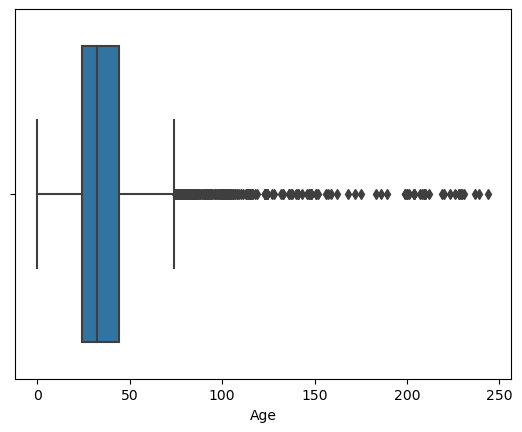

In [17]:
sns.boxplot(users_df['Age'])

In [18]:
users_df['Age'].skew()

1.178391610309946

In [19]:
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [20]:
users_df1 = users_df[pd.notnull(users_df['Location'])]
users_df1

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [21]:
users_df1[['City', 'State', 'Country']] = users_df1['Location'].str.split(', ', expand=True, n=2)
users_df1[['City', 'State', 'Country']] = users_df1[['City', 'State', 'Country']].fillna("Not specified")

In [22]:
users_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


# As we can see that in Age column approximately there are 40% of Null values

## If there are a high percentage of missing values in the Age column, replacing the missing values with the mean or median may not be appropriate. This is because the mean or median of the non-missing values may not be a good representation of the missing values. If a high percentage of the data is missing, it can skew the mean or median, making it a less accurate representation of the population.

## If the data is missing completely at random (MCAR), it means that the probability of a value being missing is independent of the missing value and of any other values in the dataset. In this case, the missing values are a random subset of the data, and the sample with the missing values is a random subset of the full data. In this scenario, imputation methods such as mean, median, random sampling, or interpolation can be used.

In [23]:
users_df1["Age"]= users_df1["Age"].fillna( users_df1["Age"].mean())

In [24]:
users_df1["Age"] = users_df1["Age"].round(0)

### The interpolate method is appropriate when the data is missing at random and there is a clear relationship between the missing and non-missing values. It is important to note that interpolation method assumes that there is a relationship between the missing and non-missing values, and that the missing values are not a random subset of the data

In [25]:
users_df1.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united kingdom


In [26]:
from textblob import TextBlob
import re

In [27]:
users_df1.Location=users_df1.Location.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))
users_df1.Location=users_df1.Location.apply(lambda x: x.title())
users_df1

,User-ID,Location,Age,City,State,Country
0,1,Nyc New York Usa,35.0,nyc,new york,usa
1,2,Stockton California Usa,18.0,stockton,california,usa
2,3,Moscow Yukon Territory Russia,35.0,moscow,yukon territory,russia
3,4,Porto Vngaia Portugal,17.0,porto,v.n.gaia,portugal
4,5,Farnborough Hants United Kingdom,35.0,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,Portland Oregon Usa,35.0,portland,oregon,usa
278854,278855,Tacoma Washington United Kingdom,50.0,tacoma,washington,united kingdom
278855,278856,Brampton Ontario Canada,35.0,brampton,ontario,canada
278856,278857,Knoxville Tennessee Usa,35.0,knoxville,tennessee,usa


In [28]:
users_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


# Merge the 3 datasets into one master dataset

In [29]:
data=ratings_df.merge(users_df1,left_on='User-ID',right_on='User-ID',how="left")

In [30]:
data=data.merge(books_df1,left_on='ISBN',right_on='ISBN',how="left")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Location             1149780 non-null  object 
 4   Age                  1149780 non-null  float64
 5   City                 1149780 non-null  object 
 6   State                1149780 non-null  object 
 7   Country              1149780 non-null  object 
 8   Book-Title           1031129 non-null  object 
 9   Book-Author          1031129 non-null  object 
 10  Year-Of-Publication  1031129 non-null  object 
 11  Publisher            1031129 non-null  object 
 12  Image-URL-S          1031129 non-null  object 
 13  Image-URL-M          1031129 non-null  object 
 14  Image-URL-L          1031129 non-null  object 
dty

In [32]:
df=data.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1149778
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031129 non-null  int64  
 1   ISBN                 1031129 non-null  object 
 2   Book-Rating          1031129 non-null  int64  
 3   Location             1031129 non-null  object 
 4   Age                  1031129 non-null  float64
 5   City                 1031129 non-null  object 
 6   State                1031129 non-null  object 
 7   Country              1031129 non-null  object 
 8   Book-Title           1031129 non-null  object 
 9   Book-Author          1031129 non-null  object 
 10  Year-Of-Publication  1031129 non-null  object 
 11  Publisher            1031129 non-null  object 
 12  Image-URL-S          1031129 non-null  object 
 13  Image-URL-M          1031129 non-null  object 
 14  Image-URL-L          1031129 non-null  object 
dty

In [34]:
df['Year-Of-Publication']=df['Year-Of-Publication'].astype(int)

# Categorizing the age column by 'Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults'

In [35]:
bin_edges = [0, 12, 20, 40, 60, 100,120]
bin_names = ['Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults']
df['Age_category'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [36]:
df.reset_index()

,index,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Young-adults
1,1,276726,0155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Young-adults
2,2,276727,0446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,Teenage
3,3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
4,4,276729,0521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031124,1149774,276704,0876044011,0,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,Young-adults
1031125,1149775,276704,1563526298,9,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,Young-adults
1031126,1149776,276706,0679447156,0,Quebec Quebec Canada,18.0,quebec,quebec,canada,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,Teenage
1031127,1149777,276709,0515107662,10,Mannington West Virginia Usa,38.0,mannington,west virginia,usa,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,Young-adults


# Descriptive statistics

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1031129.0,140594.526333,80524.848793,2.0,70415.0,141210.0,211426.0,278854.0
Book-Rating,1031129.0,2.839039,3.854152,0.0,0.0,0.0,7.0,10.0
Age,1031129.0,36.751620,12.096992,0.0,31.0,35.0,41.0,244.0
Year-Of-Publication,1031129.0,1968.194824,231.101814,0.0,1992.0,1997.0,2001.0,2050.0


In [ ]:
import sweetviz
my_report = sweetviz.analyze(df)
my_report.show_html()

# Data visualization

# Rating distribution

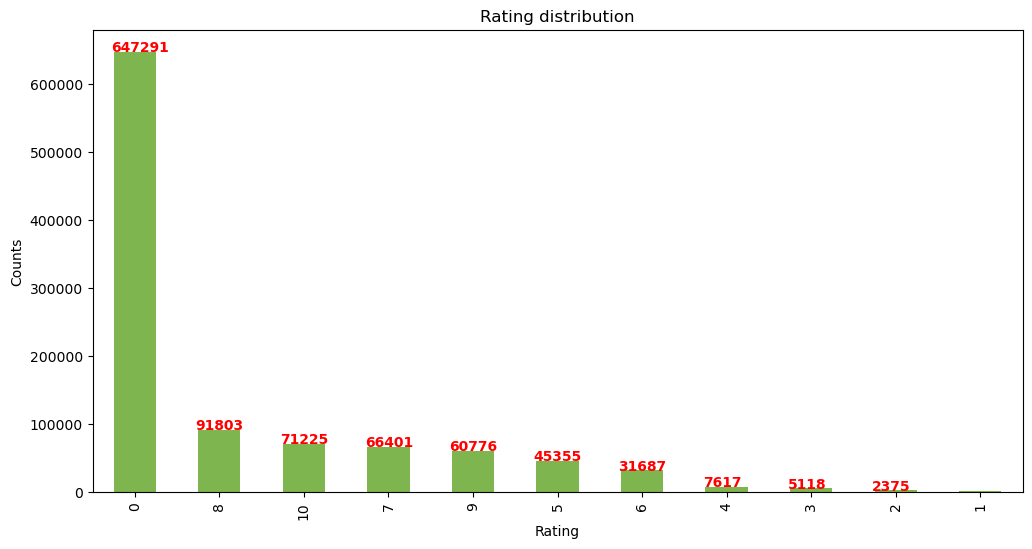

In [38]:
fig=plt.figure(figsize=(12,6))
df['Book-Rating'].value_counts(sort=True).plot(kind='bar',color='#7eb54e')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')

for index, value in enumerate(list(df['Book-Rating'].value_counts()[0:10].values)):
    plt.text(index-0.28, value+10, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

<!-- # Most no of books has received zero 'ratings
# Least no of books has received '2' ratings -->

## Most frequently appeared ratings for books are '0' ratings by users
## Least frequently appeared ratings for books are '2' ratings by users

#  List of 10 books with high number of ratings

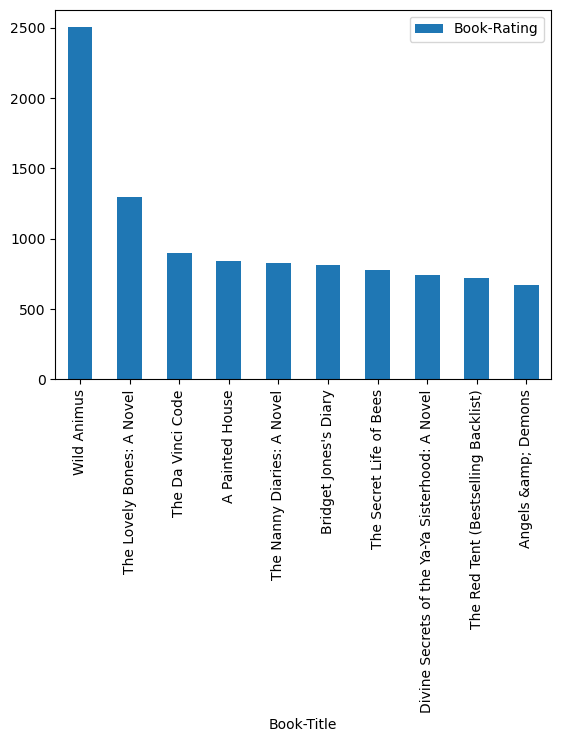

In [39]:
high_ratings=df.groupby('Book-Title')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')
plt.show()

# Book wild animus has received more than 2000 ratings

# List of 10 Authors with high number of ratings

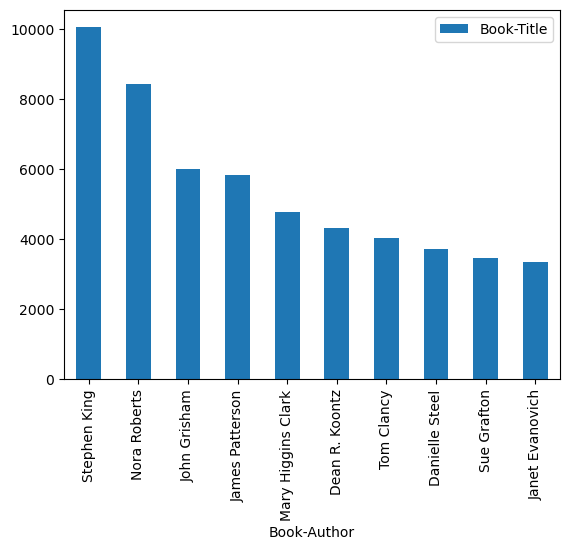

In [40]:
high_ratings1=df.groupby('Book-Author')[['Book-Title']].count()
high_ratings=high_ratings1.nlargest(10,columns='Book-Title')
high_ratings.plot(kind='bar')
plt.show()

# Bar Plot for top 10 authors mentioned in the dataframe

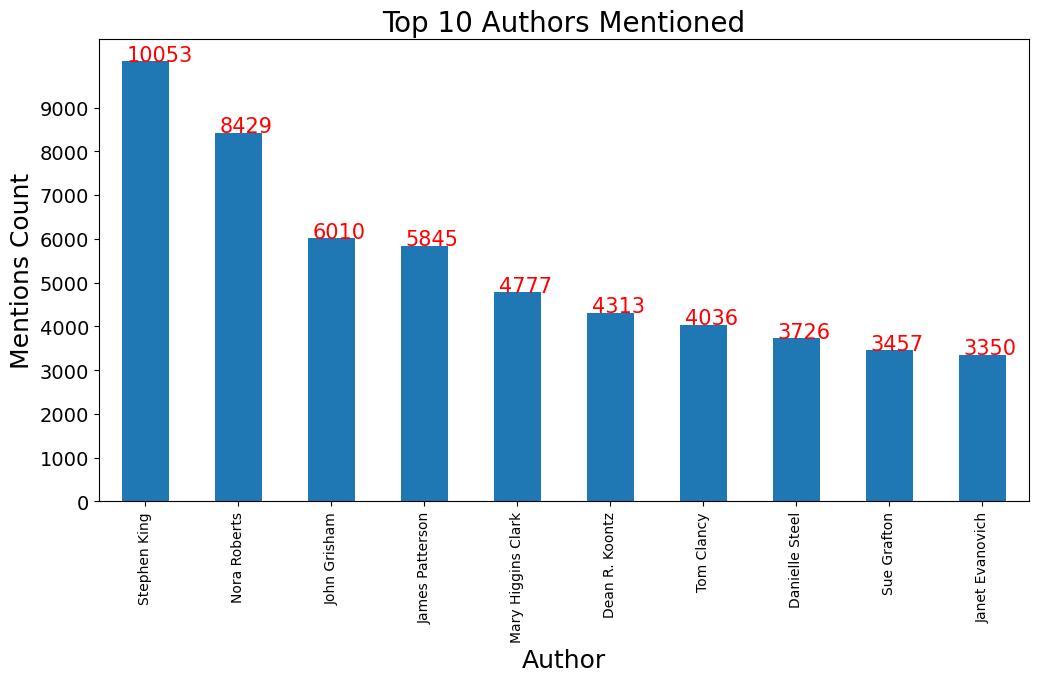

In [41]:
top10_mention = df['Book-Author'].value_counts()[:10]
plt.figure(figsize=[12,6])
top10_mention.plot(kind='bar')

plt.title("Top 10 Authors Mentioned", fontsize=20)
plt.xlabel('Author', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel('Mentions Count', fontsize=18)
plt.yticks(np.arange(0,10000,1000), fontsize=14)

for index, value in enumerate(list(top10_mention.values)):
    plt.text(index-0.2, value+10, str(value), color = 'red', fontsize = 15)
plt.show()

In [42]:
# Find the number of unique books written by each author
author_unique_books = df.groupby('Book-Author')['Book-Title'].nunique()

# Print the top 5 authors with the most unique books
print(author_unique_books.sort_values(ascending=False).head(5))

Book-Author
William Shakespeare    495
Agatha Christie        476
Ann M. Martin          392
Carolyn Keene          370
Francine Pascal        349
Name: Book-Title, dtype: int64


# Stephen king is most mentioned author among the other authors

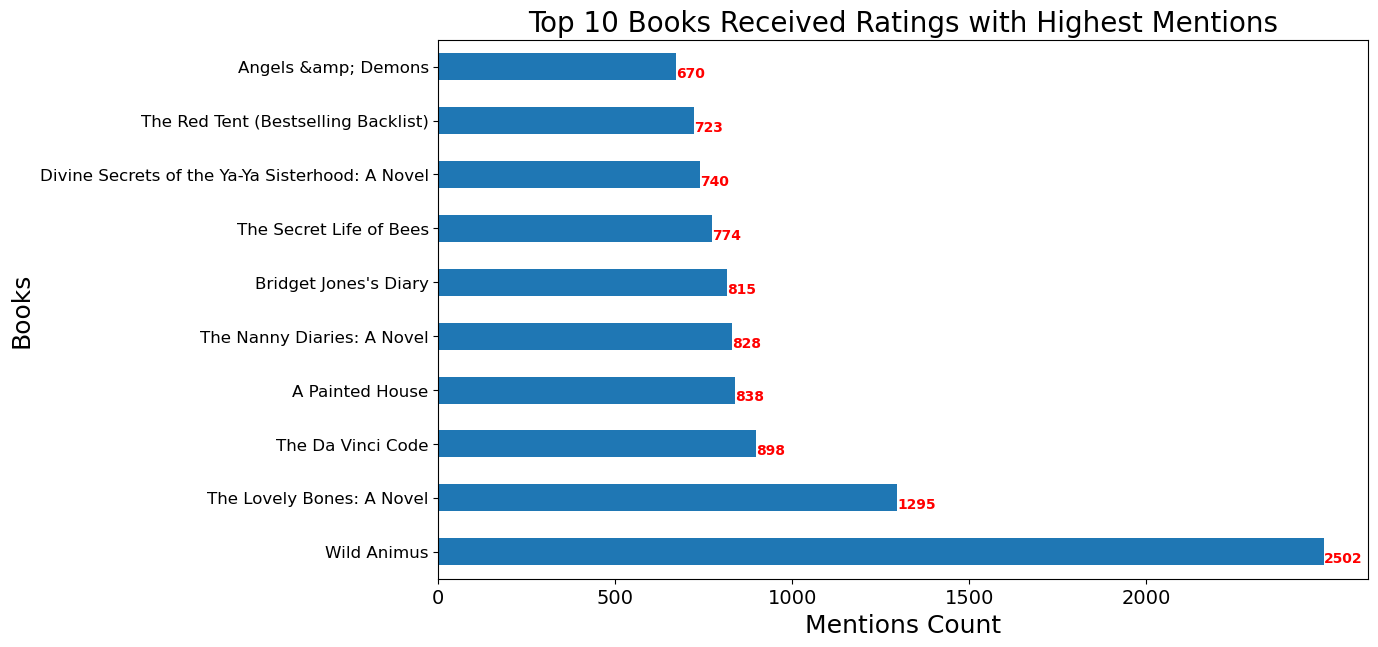

In [43]:
plt.figure(figsize=[12,7])
ax = df['Book-Title'].value_counts()[:10].plot.barh()

plt.title("Top 10 Books Received Ratings with Highest Mentions", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,2500,500),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Books', fontsize=18)

for index, value in enumerate(list(df['Book-Title'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

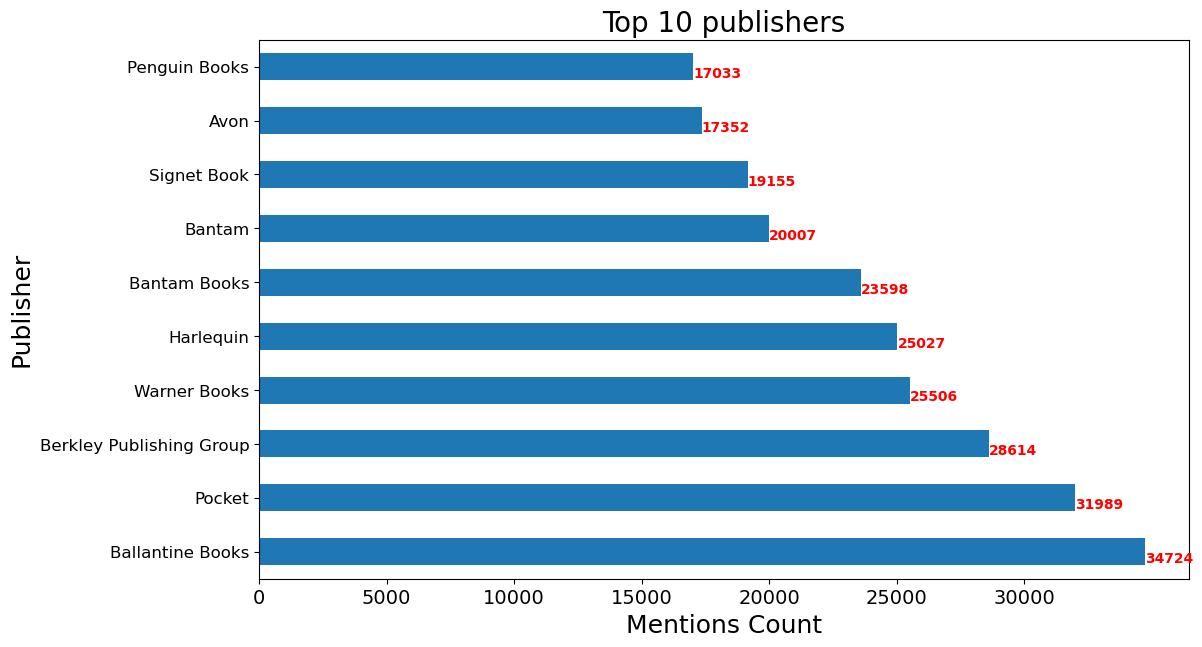

In [44]:
plt.figure(figsize=[12,7])
ax = df['Publisher'].value_counts()[:10].plot.barh()

plt.title("Top 10 publishers", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,35000,5000),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Publisher', fontsize=18)

for index, value in enumerate(list(df['Publisher'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

# Top 10 Book code received highest no of ratings 

<AxesSubplot:xlabel='ISBN'>

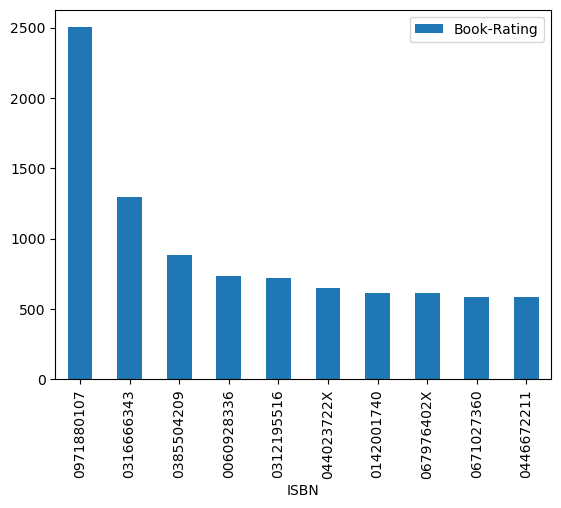

In [45]:
rating_count=pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False)[:10].plot(kind='bar')

# book-code 971880107 has received most no of ratings

In [46]:
location_df=df.iloc[:,[5,6,7]]

In [47]:
location_df

,City,State,Country
0,tyler,texas,usa
1,seattle,washington,usa
2,h,new south wales,australia
3,rijeka,n/a,croatia
4,rijeka,n/a,croatia
...,...,...,...
1149774,cedar park,texas,usa
1149775,cedar park,texas,usa
1149776,quebec,quebec,canada
1149777,mannington,west virginia,usa


In [48]:
location_df['Country'].value_counts()[:10]

usa               745812
canada             92954
united kingdom     32007
germany            27654
Not specified      24195
australia          18217
spain              14773
n/a                11177
france             10631
portugal            6975
Name: Country, dtype: int64

# Find out what is the over all share of The USA

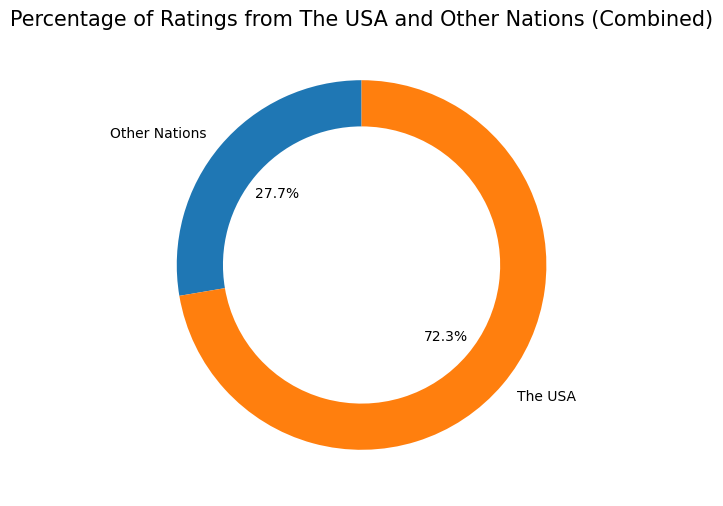

In [49]:
labels=['Other Nations', 'The USA']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df['Country']!='usa']), len(location_df[location_df['Country']=='usa'])], labels=labels, autopct='%1.1f%%',
       wedgeprops={'width':0.25}, startangle=90)
ax.set_title('Percentage of Ratings from The USA and Other Nations (Combined)', fontsize=15)
plt.show()

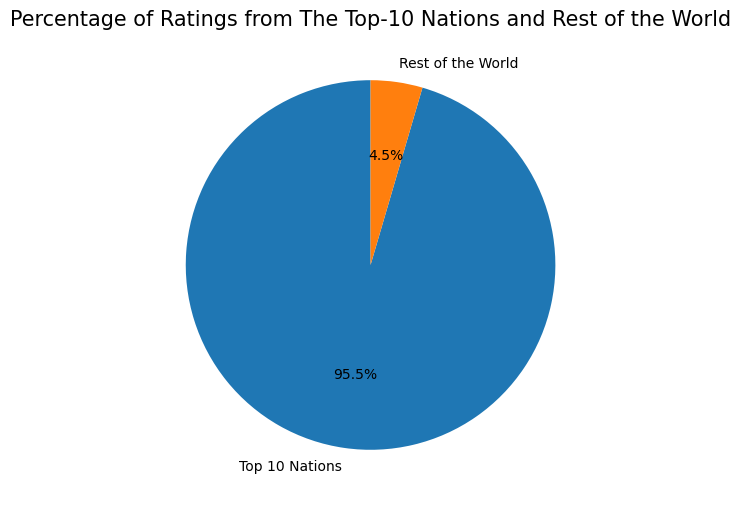

In [50]:
labels=['Top 10 Nations', 'Rest of the World']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df['Country'].isin(list(location_df['Country'].value_counts()[0:10].keys()))]), 
        len(location_df[~location_df['Country'].isin(list(location_df['Country'].value_counts()[0:10].keys()))])], labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Percentage of Ratings from The Top-10 Nations and Rest of the World', fontsize=15)
plt.show()

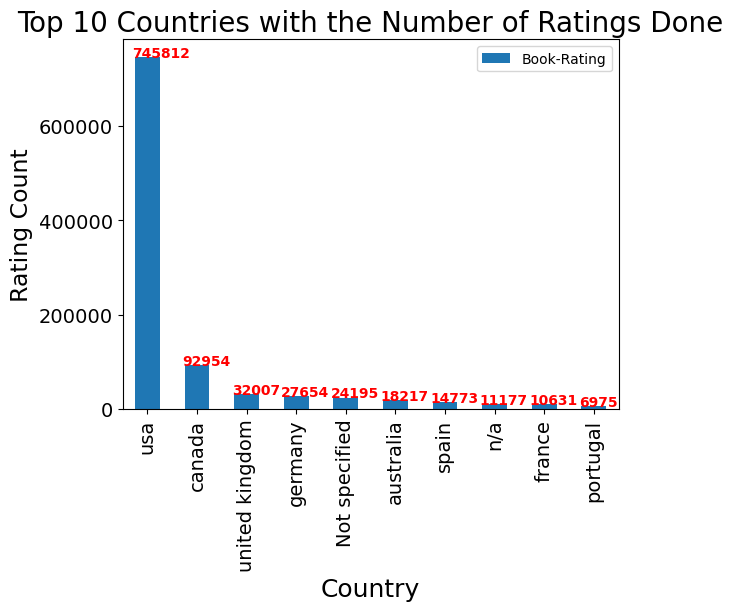

In [51]:
high_ratings=df.groupby('Country')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top 10 Countries with the Number of Ratings Done", fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Country'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot:xlabel='Age_category', ylabel='count'>)

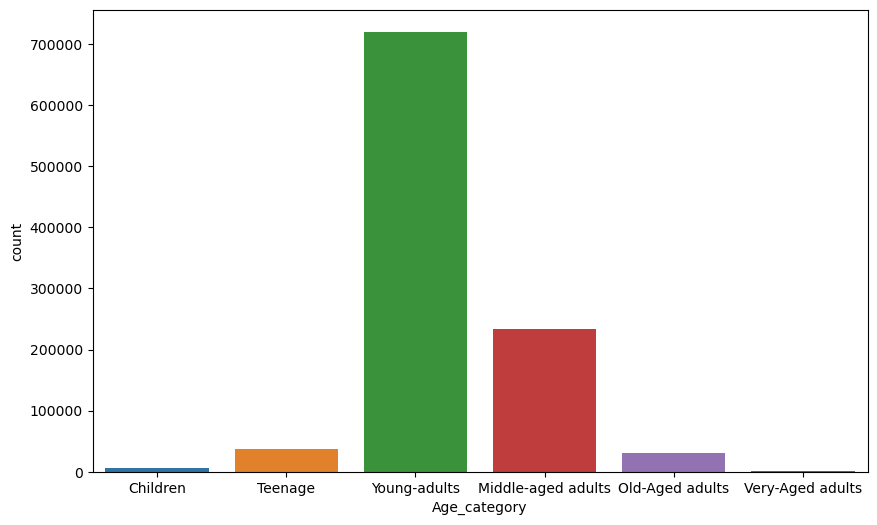

In [52]:
fig=plt.figure(figsize=(10,6))
fig,sns.countplot(df['Age_category'])

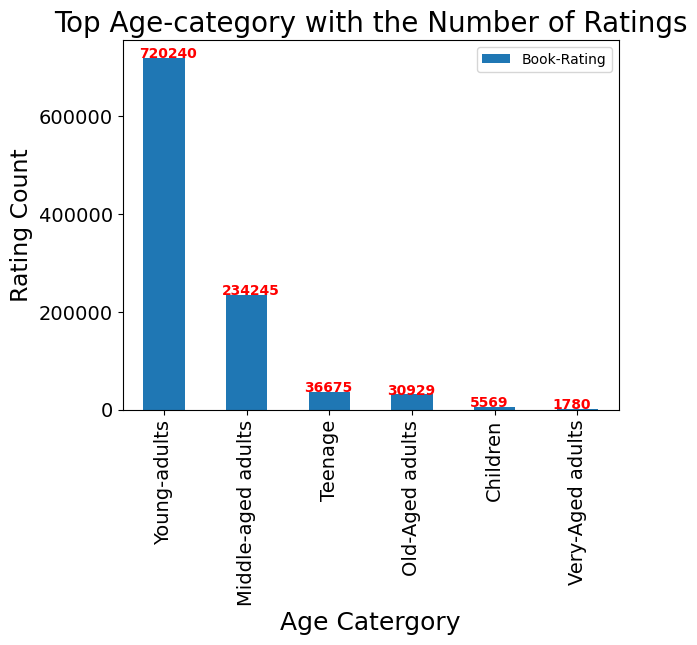

In [53]:
high_ratings=df.groupby('Age_category')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top Age-category with the Number of Ratings", fontsize=20)
plt.xlabel('Age Catergory', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Age_category'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

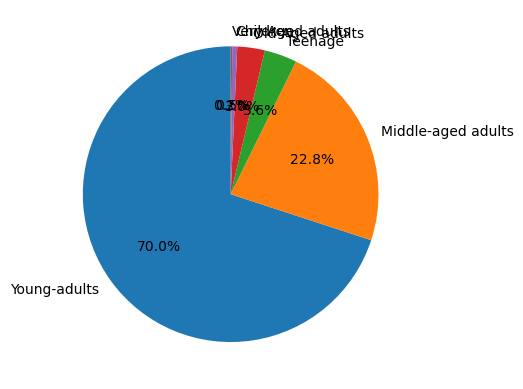

In [54]:
labels = df['Age_category'].value_counts().index
plt.pie(df['Age_category'].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90);

# WORK CLOUD

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_wordcloud(data):
    wordcloud = WordCloud(
        width=1500,
        height=800,
        min_font_size=12,
        background_color='white'
    ).generate(data)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
book_joined=' '.join(df['Book-Title'])
create_wordcloud(book_joined)

In [ ]:
author_joined=' '.join(df['Book-Author'])
create_wordcloud(author_joined)

In [ ]:
country_joined=' '.join(df['Country'])
create_wordcloud(country_joined)

# No of books published as per year

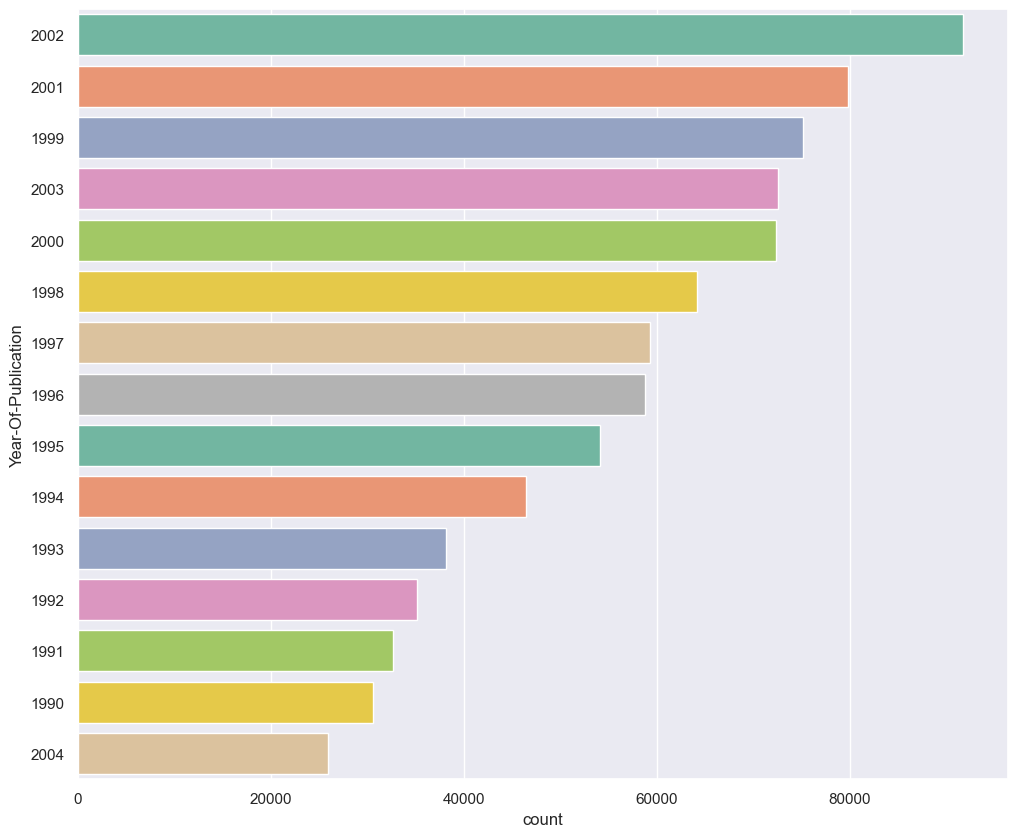

In [55]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df['Year-Of-Publication'], data=df, palette="Set2", order=df['Year-Of-Publication'].value_counts().index[0:15])

In [56]:
df.reset_index()

,index,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Young-adults
1,1,276726,0155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Young-adults
2,2,276727,0446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,Teenage
3,3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
4,4,276729,0521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031124,1149774,276704,0876044011,0,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,Young-adults
1031125,1149775,276704,1563526298,9,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,Young-adults
1031126,1149776,276706,0679447156,0,Quebec Quebec Canada,18.0,quebec,quebec,canada,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,Teenage
1031127,1149777,276709,0515107662,10,Mannington West Virginia Usa,38.0,mannington,west virginia,usa,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,Young-adults


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1149778
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   User-ID              1031129 non-null  int64   
 1   ISBN                 1031129 non-null  object  
 2   Book-Rating          1031129 non-null  int64   
 3   Location             1031129 non-null  object  
 4   Age                  1031129 non-null  float64 
 5   City                 1031129 non-null  object  
 6   State                1031129 non-null  object  
 7   Country              1031129 non-null  object  
 8   Book-Title           1031129 non-null  object  
 9   Book-Author          1031129 non-null  object  
 10  Year-Of-Publication  1031129 non-null  int32   
 11  Publisher            1031129 non-null  object  
 12  Image-URL-S          1031129 non-null  object  
 13  Image-URL-M          1031129 non-null  object  
 14  Image-URL-L          1031129 non-n

In [58]:
df1=df.iloc[:,[0,1,8,9,2]]

In [59]:
df1.head()

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,0
1,276726,0155061224,Rites of Passage,Judith Rae,5
2,276727,0446520802,The Notebook,Nicholas Sparks,0
3,276729,052165615X,Help!: Level 1,Philip Prowse,3
4,276729,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,6


In [60]:
df1.shape

(1031129, 5)

In [61]:
df1[df1.duplicated()]

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating


In [62]:
Data = df1.drop_duplicates().reset_index(drop = True)
Data

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,0
1,276726,0155061224,Rites of Passage,Judith Rae,5
2,276727,0446520802,The Notebook,Nicholas Sparks,0
3,276729,052165615X,Help!: Level 1,Philip Prowse,3
4,276729,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,6
...,...,...,...,...,...
1031124,276704,0876044011,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,0
1031125,276704,1563526298,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,9
1031126,276706,0679447156,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,0
1031127,276709,0515107662,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,10


# Popularity based recommender system

In [63]:
Data_explicit = df[(df["Book-Rating"] > 0)]
Data_explicit = Data_explicit.drop_duplicates(subset = ['User-ID', 'Book-Title'], keep = 'first').reset_index(drop = True)
Data_explicit

,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,276726,0155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Young-adults
1,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
2,276729,0521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Teenage
3,276744,038550120X,7,Torrance California Usa,35.0,torrance,california,usa,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,Young-adults
4,276747,0060517794,9,Iowa City Iowa Usa,25.0,iowa city,iowa,usa,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382810,276704,0743211383,7,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,Young-adults
382811,276704,0806917695,5,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,Young-adults
382812,276704,1563526298,9,Cedar Park Texas Usa,35.0,cedar park,texas,usa,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,Young-adults
382813,276709,0515107662,10,Mannington West Virginia Usa,38.0,mannington,west virginia,usa,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,Young-adults


In [64]:
num_ratings=Data_explicit.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratings

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135560,Ã?Â?rger mit Produkt X. Roman.,3
135561,Ã?Â?sterlich leben.,1
135562,Ã?Â?stlich der Berge.,1


In [65]:
avg_ratings=Data_explicit.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135560,Ã?Â?rger mit Produkt X. Roman.,7.000000
135561,Ã?Â?sterlich leben.,7.000000
135562,Ã?Â?stlich der Berge.,8.000000


In [66]:
popular_df=num_ratings.merge(avg_ratings,on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


In [67]:
popular_df= popular_df.merge(Data_explicit, on="Book-Title").drop_duplicates("Book-Title")
popular_df

,Book-Title,num_ratings,avg_ratings,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,96448,0590567330,9,Albuquerque New Mexico Usa,35.0,albuquerque,new mexico,usa,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,Young-adults
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,269557,0310232546,8,Ypsilanti Michigan Usa,40.0,ypsilanti,michigan,usa,Nancy N. Rue,2001,Zonderkidz,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...,Young-adults
2,Dark Justice,1,10.000000,98391,0399151788,10,Morrow Georgia Usa,52.0,morrow,georgia,usa,Jack Higgins,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399151788.0...,http://images.amazon.com/images/P/0399151788.0...,http://images.amazon.com/images/P/0399151788.0...,Middle-aged adults
3,Earth Prayers From around the World: 365 Pray...,7,7.142857,26544,006250746X,9,Woodbridge Virginia Usa,37.0,woodbridge,virginia,usa,Elizabeth Roberts,1991,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,Young-adults
10,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000,30072,1566869250,10,St Louis Missouri Usa,11.0,st. louis,missouri,usa,David Cassady,1999,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382808,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000,219420,3724303432,8,Mannheim Badenwuerttemberg Germany,29.0,mannheim,baden-wuerttemberg,germany,Christopher Fennel,1998,"Reich, Luzern",http://images.amazon.com/images/P/3724303432.0...,http://images.amazon.com/images/P/3724303432.0...,http://images.amazon.com/images/P/3724303432.0...,Young-adults
382809,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,35407,325721538X,6,Gtersloh Nordrheinwestfalen Germany,48.0,gütersloh,nordrhein-westfalen,germany,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,Middle-aged adults
382812,Ã?Â?sterlich leben.,1,7.000000,256636,3451274973,7,Ulm Badenwuerttemberg Germany,51.0,89075 ulm,baden-wuerttemberg,germany,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg",http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...,Middle-aged adults
382813,Ã?Â?stlich der Berge.,1,8.000000,90839,3442725739,8,Munich Bayern Germany,36.0,munich,bayern,germany,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,Young-adults


In [68]:
popular_df= popular_df.drop(['User-ID', 'City', 'State', 'Country', 'Book-Rating','Image-URL-S','Image-URL-L'], axis=1)
popular_df.reset_index(drop=True, inplace=True)

In [69]:
popular_df

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,0590567330,Albuquerque New Mexico Usa,35.0,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,Young-adults
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Ypsilanti Michigan Usa,40.0,Nancy N. Rue,2001,Zonderkidz,http://images.amazon.com/images/P/0310232546.0...,Young-adults
2,Dark Justice,1,10.000000,0399151788,Morrow Georgia Usa,52.0,Jack Higgins,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399151788.0...,Middle-aged adults
3,Earth Prayers From around the World: 365 Pray...,7,7.142857,006250746X,Woodbridge Virginia Usa,37.0,Elizabeth Roberts,1991,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,Young-adults
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000,1566869250,St Louis Missouri Usa,11.0,David Cassady,1999,BradyGames,http://images.amazon.com/images/P/1566869250.0...,Children
...,...,...,...,...,...,...,...,...,...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000,3724303432,Mannheim Badenwuerttemberg Germany,29.0,Christopher Fennel,1998,"Reich, Luzern",http://images.amazon.com/images/P/3724303432.0...,Young-adults
135560,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,325721538X,Gtersloh Nordrheinwestfalen Germany,48.0,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,Middle-aged adults
135561,Ã?Â?sterlich leben.,1,7.000000,3451274973,Ulm Badenwuerttemberg Germany,51.0,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg",http://images.amazon.com/images/P/3451274973.0...,Middle-aged adults
135562,Ã?Â?stlich der Berge.,1,8.000000,3442725739,Munich Bayern Germany,36.0,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,Young-adults


In [70]:
popular_books=popular_df[(popular_df['avg_ratings']>=7.5) & (popular_df['num_ratings']>=100)].sort_values("avg_ratings", ascending=False).head(50)
popular_books

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
119059,"The Two Towers (The Lord of the Rings, Part 2)",135,9.333333,0345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
115126,"The Return of the King (The Lord of the Rings,...",101,9.297030,0395272211,Na Na Na,35.0,J. R. R. Tolkien,1988,Houghton Mifflin,http://images.amazon.com/images/P/0395272211.0...,Young-adults
45380,Harry Potter and the Goblet of Fire (Book 4),242,9.107438,0439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
45399,Harry Potter and the Sorcerer's Stone (Book 1),173,9.057803,0590353403,Minneapolis Minnesota Usa,24.0,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,Young-adults
45392,Harry Potter and the Prisoner of Azkaban (Book 3),274,9.051095,0439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
45384,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,043935806X,Mentone California Usa,35.0,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,Young-adults
123679,To Kill a Mockingbird,266,8.981203,0446310786,Petaling Jaya Selangor Malaysia,18.0,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,Teenage
45402,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,059035342X,Pittsburgh Pennsylvania Usa,35.0,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,Young-adults
34427,Ender's Game (Ender Wiggins Saga (Paperback)),150,8.920000,0812533550,Arlington Massachusetts Usa,35.0,Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,Young-adults
104947,The Fellowship of the Ring (The Lord of the Ri...,203,8.891626,0618129030,Cary North Carolina Usa,35.0,J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129030.0...,Young-adults


In [71]:
popular_books.shape

(50, 11)

In [72]:
popular_books.loc[popular_books.ISBN == "0395272211", "Location"] = "Not Available"
popular_books

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
119059,"The Two Towers (The Lord of the Rings, Part 2)",135,9.333333,0345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
115126,"The Return of the King (The Lord of the Rings,...",101,9.297030,0395272211,Not Available,35.0,J. R. R. Tolkien,1988,Houghton Mifflin,http://images.amazon.com/images/P/0395272211.0...,Young-adults
45380,Harry Potter and the Goblet of Fire (Book 4),242,9.107438,0439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
45399,Harry Potter and the Sorcerer's Stone (Book 1),173,9.057803,0590353403,Minneapolis Minnesota Usa,24.0,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,Young-adults
45392,Harry Potter and the Prisoner of Azkaban (Book 3),274,9.051095,0439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
45384,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,043935806X,Mentone California Usa,35.0,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,Young-adults
123679,To Kill a Mockingbird,266,8.981203,0446310786,Petaling Jaya Selangor Malaysia,18.0,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,Teenage
45402,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,059035342X,Pittsburgh Pennsylvania Usa,35.0,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,Young-adults
34427,Ender's Game (Ender Wiggins Saga (Paperback)),150,8.920000,0812533550,Arlington Massachusetts Usa,35.0,Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,Young-adults
104947,The Fellowship of the Ring (The Lord of the Ri...,203,8.891626,0618129030,Cary North Carolina Usa,35.0,J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129030.0...,Young-adults


In [73]:
popular_books_c=popular_df[(popular_df['avg_ratings']>=5) & (popular_df['num_ratings']>=15)].sort_values("avg_ratings", ascending=False)
popular_books_c

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
45376,Harry Potter and the Chamber of Secrets Postca...,23,9.869565,0439425220,Bellwood Pennsylvania Usa,35.0,J. K. Rowling,2002,Scholastic,http://images.amazon.com/images/P/0439425220.0...,Young-adults
115123,"The Return of the King (The Lord of The Rings,...",16,9.625000,0618002243,Santo Tirso Porto Portugal,21.0,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002243.0...,Young-adults
39675,Fox in Socks (I Can Read It All by Myself Begi...,15,9.600000,0394800389,Duluth Minnesota Usa,28.0,Dr. Seuss,1965,Random House Children's Books,http://images.amazon.com/images/P/0394800389.0...,Young-adults
98332,The Authoritative Calvin and Hobbes (Calvin an...,20,9.600000,0836218221,Montreal Quebec Canada,35.0,Bill Watterson,1990,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218221.0...,Young-adults
17283,Calvin and Hobbes,24,9.583333,0836220889,Ottawa Ontario Canada,35.0,Bill Watterson,1987,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836220889.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...
53043,Isle of Dogs,106,5.433962,0425182908,Elburn Illinois Usa,35.0,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,Young-adults
39577,Four Blondes,65,5.353846,080213825X,Boulder Colorado Usa,49.0,Candace Bushnell,2001,Grove Press,http://images.amazon.com/images/P/080213825X.0...,Middle-aged adults
21885,Confessions of a Sociopathic Social Climber : ...,20,5.250000,0312288115,Rome New York Usa,35.0,Adele Lang,2002,Thomas Dunne Books,http://images.amazon.com/images/P/0312288115.0...,Young-adults
48257,Hotel World,16,5.250000,0385722109,Los Angeles California Usa,23.0,ALI SMITH,2002,Anchor,http://images.amazon.com/images/P/0385722109.0...,Young-adults


In [74]:
Children = ['Children']
popular_books_Children = popular_books_c[popular_books_c['Age_category'].isin(Children)]
popular_books_Children = popular_books_Children.head(10)
popular_books_Children

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
100855,The Cat in the Hat,33,9.242424,039480001X,Olympia Washington Usa,8.0,Dr. Seuss,1957,Random House Books for Young Readers,http://images.amazon.com/images/P/039480001X.0...,Children
48002,Hop on Pop (I Can Read It All by Myself Beginn...,19,8.894737,039480029X,Olympia Washington Usa,8.0,Dr. Seuss,1963,Random House Books for Young Readers,http://images.amazon.com/images/P/039480029X.0...,Children
82201,Random Acts of Kindness,20,8.800000,1573248533,Calgary Alberta Canada,11.0,Dawna Markova,2002,Conari Press,http://images.amazon.com/images/P/1573248533.0...,Children
18992,Charlotte's Web,45,8.511111,059030271X,Highland California Usa,10.0,E. B. White,1974,Scholastic Paperbacks (T),http://images.amazon.com/images/P/059030271X.0...,Children
31919,E-Wally and the Quest,18,8.111111,0971181802,St Charles County Missouri Usa,2.0,Judy Shasek,2001,Inventeam Llc,http://images.amazon.com/images/P/0971181802.0...,Children
100030,The Boy Next Door,59,8.050847,0060096195,Calgary Alberta Canada,11.0,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,Children
9372,"Artemis Fowl (Artemis Fowl, Book 1)",106,7.716981,0786817070,Calgary Alberta Canada,11.0,Eoin Colfer,2002,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,Children
103489,The Dive From Clausen's Pier : A Novel (Vintag...,52,7.576923,0375727132,Grosse Pointe Michigan Usa,1.0,ANN PACKER,2003,Vintage,http://images.amazon.com/images/P/0375727132.0...,Children
64064,Madame Bovary,16,7.125000,0451523873,St Charles County Missouri Usa,2.0,Gustave Flaubert,1994,Signet Classics,http://images.amazon.com/images/P/0451523873.0...,Children
15066,Border Music,30,6.500000,0446518581,Gardiner Maine Usa,12.0,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/0446518581.0...,Children


In [75]:
popular_books_age=popular_df[(popular_df['avg_ratings']>=7) & (popular_df['num_ratings']>=50)].sort_values("avg_ratings", ascending=False)
popular_books_age

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
119059,"The Two Towers (The Lord of the Rings, Part 2)",135,9.333333,0345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
115126,"The Return of the King (The Lord of the Rings,...",101,9.297030,0395272211,Na Na Na,35.0,J. R. R. Tolkien,1988,Houghton Mifflin,http://images.amazon.com/images/P/0395272211.0...,Young-adults
109835,The Little Prince,90,9.111111,0156528207,Torrance California Usa,31.0,Antoine de Saint-ExupÃ©ry,1968,Harcourt,http://images.amazon.com/images/P/0156528207.0...,Young-adults
45380,Harry Potter and the Goblet of Fire (Book 4),242,9.107438,0439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
925,84 Charing Cross Road,59,9.101695,0860074382,Weybridge Surrey United Kingdom,35.0,Helene Hanff,0,Warner Books> C/o Little Br,http://images.amazon.com/images/P/0860074382.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...
77027,Paradise,51,7.039216,0452280397,Cincinnati Ohio Usa,25.0,Toni Morrison,1999,Plume Books,http://images.amazon.com/images/P/0452280397.0...,Young-adults
114993,The Regulators,60,7.033333,0525941908,Columbus Georgia Usa,35.0,Richard Bachman,1996,Dutton Books,http://images.amazon.com/images/P/0525941908.0...,Young-adults
2797,A Map of the World,116,7.025862,0385720106,Arden Hills Minnesota Usa,35.0,Jane Hamilton,1999,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385720106.0...,Young-adults
108982,The Lake House,56,7.017857,0316603287,San Diego California Usa,20.0,James Patterson,2003,"Little, Brown",http://images.amazon.com/images/P/0316603287.0...,Teenage


In [76]:
teen = ['Teenage']
popular_books_Teenage = popular_books_age[popular_books_age['Age_category'].isin(teen)]
popular_books_Teenage = popular_books_Teenage[popular_books_Teenage['num_ratings']>40].sort_values('avg_ratings', ascending= False)
popular_books_Teenage = popular_books_Teenage.head(10)
popular_books_Teenage

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
119059,"The Two Towers (The Lord of the Rings, Part 2)",135,9.333333,0345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
123679,To Kill a Mockingbird,266,8.981203,0446310786,Petaling Jaya Selangor Malaysia,18.0,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,Teenage
8442,Anne of Green Gables (Anne of Green Gables Nov...,66,8.878788,055321313X,Wentzville Missouri Usa,16.0,L.M. MONTGOMERY,1982,Bantam Classics,http://images.amazon.com/images/P/055321313X.0...,Teenage
4470,A Wrinkle In Time,81,8.876543,0440498058,St Louis Missouri Usa,14.0,MADELEINE L'ENGLE,1998,Yearling,http://images.amazon.com/images/P/0440498058.0...,Teenage
131347,Where the Red Fern Grows,65,8.630769,0553274295,Pine Bush New York Usa,14.0,Wilson Rawls,1984,Random House Children's Books,http://images.amazon.com/images/P/0553274295.0...,Teenage
106037,The Giver (21st Century Reference),102,8.627451,0440219078,Roanoke Virginia Usa,14.0,LOIS LOWRY,1994,Laure Leaf,http://images.amazon.com/images/P/0440219078.0...,Teenage
125562,"Tuesdays with Morrie: An Old Man, a Young Man,...",249,8.582329,0385484518,Baton Rouge Louisiana Usa,17.0,MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,Teenage
72598,Night,100,8.520000,0553272535,Gonzales Louisiana Usa,18.0,Elie Wiesel,1982,Bantam Books,http://images.amazon.com/images/P/0553272535.0...,Teenage
116194,The Secret Life of Bees,402,8.470149,0142001740,Baton Rouge Louisiana Usa,17.0,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,Teenage
74364,Of Mice and Men (Penguin Great Books of the 20...,52,8.326923,0140177396,Norfolk Virginia Usa,18.0,John Steinbeck,1993,Penguin Books,http://images.amazon.com/images/P/0140177396.0...,Teenage


In [77]:
Young_adults = ['Young-adults']
popular_books_Young_adults = popular_books_age[popular_books_age['Age_category'].isin(Young_adults)]
popular_books_Young_adults = popular_books_Young_adults[popular_books_Young_adults['num_ratings']>250].sort_values('avg_ratings', ascending= False)
popular_books_Young_adults = popular_books_Young_adults.head(10)
popular_books_Young_adults

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
45402,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,059035342X,Pittsburgh Pennsylvania Usa,35.0,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,Young-adults
102701,The Da Vinci Code,494,8.439271,0385504209,Barcelona Barcelona Spain,22.0,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,Young-adults
114958,The Red Tent (Bestselling Backlist),383,8.182768,0312195516,Vancouver British Columbia Canada,33.0,Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,Young-adults
131336,Where the Heart Is (Oprah's Book Club (Paperba...,295,8.142373,0446672211,Bath Pennsylvania Usa,40.0,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,Young-adults
60687,Life of Pi,335,8.086567,0156027321,Norcross Georgia Usa,34.0,Yann Martel,2003,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,Young-adults
42292,Girl with a Pearl Earring,278,7.982014,0452282152,Skillman New Jersey Usa,35.0,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,Young-adults
29941,Divine Secrets of the Ya-Ya Sisterhood: A Novel,323,7.876161,0060928336,Sonoma California Usa,34.0,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,Young-adults
123442,Timeline,262,7.866412,0345417623,Peoria Illinois Usa,35.0,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,Young-adults
90905,Snow Falling on Cedars,275,7.829091,067976402X,Sunnyvale Callif Usa,35.0,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,Young-adults
100876,The Catcher in the Rye,265,7.701887,0316769487,San Francisco California Usa,35.0,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,Young-adults


In [78]:
Middle_aged_adults = ['Middle-aged adults']
popular_books_Middle_aged_adults = popular_books_age[popular_books_age['Age_category'].isin(Middle_aged_adults)]
popular_books_Middle_aged_adults= popular_books_Middle_aged_adults[popular_books_Middle_aged_adults['num_ratings']>100].sort_values('avg_ratings', ascending= False)
popular_books_Middle_aged_adults = popular_books_Middle_aged_adults.head(10)
popular_books_Middle_aged_adults

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
45380,Harry Potter and the Goblet of Fire (Book 4),242,9.107438,0439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
45392,Harry Potter and the Prisoner of Azkaban (Book 3),274,9.051095,0439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
45373,Harry Potter and the Chamber of Secrets (Book 2),321,8.834891,0439064872,Lakeland Tennessee Usa,57.0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,Middle-aged adults
45187,Hard Eight : A Stephanie Plum Novel (A Stephan...,123,8.333333,0312265859,Lakeland Tennessee Usa,57.0,Janet Evanovich,2002,St. Martin's Press,http://images.amazon.com/images/P/0312265859.0...,Middle-aged adults
125996,Two for the Dough,112,8.258929,0671001795,East Orange New Jersey Usa,56.0,Janet Evanovich,1996,Pocket,http://images.amazon.com/images/P/0671001795.0...,Middle-aged adults
4260,A Walk in the Woods: Rediscovering America on ...,106,8.207547,0767902521,Hurst Texas Usa,49.0,Bill Bryson,1999,Broadway Books,http://images.amazon.com/images/P/0767902521.0...,Middle-aged adults
67965,Misery,133,8.105263,0451153553,New Orleans Louisiana Usa,41.0,Stephen King,1988,New Amer Library,http://images.amazon.com/images/P/0451153553.0...,Middle-aged adults
62382,Lord of the Flies,123,8.040650,0399501487,Gilbert Arizona Usa,48.0,William Gerald Golding,1959,Perigee Trade,http://images.amazon.com/images/P/0399501487.0...,Middle-aged adults
4046,A Time to Kill,213,8.009390,0440211727,Forsyth Montana Usa,48.0,JOHN GRISHAM,1992,Dell,http://images.amazon.com/images/P/0440211727.0...,Middle-aged adults
52492,Into the Wild,135,7.977778,0385486804,Gilbert Arizona Usa,48.0,Jon Krakauer,1997,Anchor,http://images.amazon.com/images/P/0385486804.0...,Middle-aged adults


In [79]:
Old_Aged_adults = ['Old-Aged adults']
popular_books_Old_Aged_adults = popular_books_age[popular_books_age['Age_category'].isin(Old_Aged_adults)]
popular_books_Old_Aged_adults = popular_books_Old_Aged_adults[popular_books_Old_Aged_adults['num_ratings']>70].sort_values('avg_ratings', ascending= False)
popular_books_Old_Aged_adults = popular_books_Old_Aged_adults.head(10)
popular_books_Old_Aged_adults

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
36893,Fast Food Nation: The Dark Side of the All-Ame...,154,8.415584,0060938455,Houston Texas Usa,66.0,Eric Schlosser,2002,Perennial,http://images.amazon.com/images/P/0060938455.0...,Old-Aged adults
110227,The Lovely Bones: A Novel,707,8.185290,0316666343,Turner Oregon Usa,65.0,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,Old-Aged adults
20940,Cold Mountain,79,8.113924,0871136791,Three Rivers Michigan Usa,72.0,Charles Frazier,1997,Atlantic Monthly Press,http://images.amazon.com/images/P/0871136791.0...,Old-Aged adults
11251,Balzac and the Little Chinese Seamstress : A N...,130,8.030769,0385722206,Greenville South Carolina Usa,66.0,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...,Old-Aged adults
8134,Angels &amp; Demons,309,8.009709,0743486226,Garden Grove California Usa,70.0,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,Old-Aged adults
20943,Cold Mountain : A Novel,134,7.776119,0375700757,Columbiana Alabama Usa,63.0,CHARLES FRAZIER,1998,Vintage,http://images.amazon.com/images/P/0375700757.0...,Old-Aged adults
608,2nd Chance,147,7.761905,0316693200,Woodstock Virginia Usa,62.0,James Patterson,2002,"Little, Brown",http://images.amazon.com/images/P/0316693200.0...,Old-Aged adults
19323,Chicken Soup for the Soul (Chicken Soup for th...,95,7.715789,155874262X,New Smyrna Beach Florida Usa,62.0,Jack Canfield,1993,Health Communications,http://images.amazon.com/images/P/155874262X.0...,Old-Aged adults
79536,Pop Goes the Weasel,109,7.559633,0316693286,Anchorage Alaska Usa,61.0,James Patterson,1999,Replica Books,http://images.amazon.com/images/P/0316693286.0...,Old-Aged adults
24257,Daddy's Little Girl,98,7.489796,0743206045,Woodstock Virginia Usa,62.0,Mary Higgins Clark,2002,Simon &amp; Schuster,http://images.amazon.com/images/P/0743206045.0...,Old-Aged adults


# We can see that majority of the ratings are around 4 and 5.

# book-Harry Potter and the Goblet of Fire (Book 4) has maximum average rattings of 5.945.

In [80]:
#basic overview
print('After data cleaning, the final dataset has:')
print(len(df1.groupby(['Book-Title']).count()), 'books')
print(len(df1.groupby(['Book-Author']).count()), 'authors')
print(len(df1.groupby(['ISBN']).count()), 'book-code')

After data cleaning, the final dataset has:
241066 books
101585 authors
270145 book-code


# Content based 

In [81]:
x=df1.groupby("User-ID").count()["Book-Rating"]>50

In [82]:
x_table = x[x].index#boolean indexing x[x] helps us to filter the userid rated more than 50 times
x_table

Int64Index([   243,    254,    507,    638,    643,    741,    882,    929,
              1211,   1424,
            ...
            277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582,
            278633, 278843],
           dtype='int64', name='User-ID', length=3012)

In [83]:
updated_rating = df1[df1["User-ID"].isin(x_table)]

In [84]:
updated_rating.sort_values(by='User-ID')

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
10031,243,0803251718,Crazy Horse,Mari Sandoz,5
10013,243,0449911004,Patty Jane's House of Curl (Ballantine Reader'...,LORNA LANDVIK,0
10011,243,0446612790,2nd Chance,James Patterson,0
10010,243,0446610399,The Rescue,Nicholas Sparks,0
10009,243,0446606383,The Midnight Club,James Patterson,6
...,...,...,...,...,...
9482,278843,0440477093,The Secret Garden,Frances H. Burnett,0
9483,278843,0446678651,Fun with Phone Solicitors : 50 Ways to Get Even!,Robert Harris,0
9484,278843,0449223604,M Is for Malice,Sue Grafton,0
9486,278843,0553574760,Death at Buckingham Palace: Her Majesty Invest...,C. C. Benison,0


In [85]:
y = updated_rating.groupby("Book-Title").count()["Book-Rating"]>=50

In [86]:
y_table=y[y].index

In [87]:
y[y].index

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Writ of Execution', 'Wuthering Heights',
       'Wuthering Heights (Penguin Classics)', 'Year of Wonders',
       'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1350)

In [88]:
final_rating=updated_rating[updated_rating["Book-Title"].isin(y_table)]

In [89]:
final_rating.head()

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
413,276925,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,10
419,276925,0140327592,Matilda,Roald Dahl,0
426,276925,0316666343,The Lovely Bones: A Novel,Alice Sebold,0
429,276925,0385504209,The Da Vinci Code,Dan Brown,8
453,276925,0804106304,The Joy Luck Club,Amy Tan,0


In [90]:
table = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating').fillna(0)

In [91]:
table

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from scipy.sparse import csr_matrix
user_rating_matrix = csr_matrix(table.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [93]:
query_index = np.random.choice(table.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(table.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

36


In [94]:
table.shape

(1350, 2950)

In [95]:
table.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [96]:
table.index[query_index]

'A Simple Plan'

In [97]:
indices.flatten()

array([  36,  710, 1334,  774,  332,  265], dtype=int64)

In [98]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(table.index[query_index]))
    else:
        print('{0}: {1}'.format(i, table.index[indices.flatten()[i]]))

Recommendations for A Simple Plan:

1: Presumed Innocent
2: Winter Moon
3: Saving Faith
4: Eyes of a Child
5: Debt of Honor (Jack Ryan Novels)


# User based collaborative filtering

In [99]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine,correlation

In [100]:
matrix = final_rating.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
matrix

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,...,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778,-0.077778
254,8.898519,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,...,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481,-0.101481
507,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,...,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481,-0.041481
638,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,8.805185,-0.194815,-0.194815,-0.194815,-0.194815,...,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815,-0.194815
643,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,...,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185


In [102]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011172,-0.007174,0.099337,-0.002736,-0.002736,-0.009610,-0.007656,-0.004735,0.145649,...,-0.005461,-0.006548,0.050766,-0.007108,NaN,-0.008937,-0.007775,-0.008349,0.037081,-0.008208
254,-0.011172,1.000000,0.224649,-0.016113,-0.003027,-0.003027,-0.010633,-0.008472,-0.005239,-0.009521,...,-0.006043,-0.007245,-0.011254,-0.007865,NaN,-0.009889,-0.008603,-0.009239,-0.013275,0.088879
507,-0.007174,0.224649,1.000000,-0.010347,-0.001944,-0.001944,-0.006828,-0.005440,-0.003365,-0.006114,...,-0.003880,-0.004653,-0.007226,-0.005050,NaN,-0.006350,-0.005525,-0.005933,-0.008524,-0.005832
638,0.099337,-0.016113,-0.010347,1.000000,-0.003946,-0.003946,0.114320,-0.011042,0.114509,0.050390,...,-0.007876,0.042123,-0.014667,0.061969,NaN,-0.012889,0.054717,-0.012041,0.080736,-0.011837
643,-0.002736,-0.003027,-0.001944,-0.003946,1.000000,-0.000741,-0.002604,-0.002075,-0.001283,-0.002331,...,-0.001480,-0.001774,-0.002756,-0.001926,NaN,-0.002422,-0.002107,-0.002262,-0.003251,-0.002224


In [103]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        , -0.01117244, -0.0071744 , ..., -0.00834913,
         0.03708099, -0.00820779],
       [-0.01117244,  1.        ,  0.22464927, ..., -0.00923855,
        -0.01327478,  0.08887923],
       [-0.0071744 ,  0.22464927,  1.        , ..., -0.00593254,
        -0.00852442, -0.00583211],
       ...,
       [-0.00834913, -0.00923855, -0.00593254, ...,  1.        ,
        -0.00992021, -0.00678706],
       [ 0.03708099, -0.01327478, -0.00852442, ..., -0.00992021,
         1.        ,  0.08151475],
       [-0.00820779,  0.08887923, -0.00583211, ..., -0.00678706,
         0.08151475,  1.        ]])

In [104]:
# Pick a user ID
picked_userid = np.random.choice(user_similarity.index)

print(picked_userid)

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

149802


User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011172,-0.007174,0.099337,-0.002736,-0.002736,-0.009610,-0.007656,-0.004735,0.145649,...,-0.005461,-0.006548,0.050766,-0.007108,NaN,-0.008937,-0.007775,-0.008349,0.037081,-0.008208
254,-0.011172,1.000000,0.224649,-0.016113,-0.003027,-0.003027,-0.010633,-0.008472,-0.005239,-0.009521,...,-0.006043,-0.007245,-0.011254,-0.007865,NaN,-0.009889,-0.008603,-0.009239,-0.013275,0.088879
507,-0.007174,0.224649,1.000000,-0.010347,-0.001944,-0.001944,-0.006828,-0.005440,-0.003365,-0.006114,...,-0.003880,-0.004653,-0.007226,-0.005050,NaN,-0.006350,-0.005525,-0.005933,-0.008524,-0.005832
638,0.099337,-0.016113,-0.010347,1.000000,-0.003946,-0.003946,0.114320,-0.011042,0.114509,0.050390,...,-0.007876,0.042123,-0.014667,0.061969,NaN,-0.012889,0.054717,-0.012041,0.080736,-0.011837
643,-0.002736,-0.003027,-0.001944,-0.003946,1.000000,-0.000741,-0.002604,-0.002075,-0.001283,-0.002331,...,-0.001480,-0.001774,-0.002756,-0.001926,NaN,-0.002422,-0.002107,-0.002262,-0.003251,-0.002224


In [105]:
# Number of similar users
n = 5

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 149802 are Series([], Name: 149802, dtype: float64)


In [106]:
# Books that the target user has read
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
149802,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,...,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852,-0.011852


In [107]:
# Books that similar users watched. Remove books that none of the similar users have read.
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

Book-Title
User-ID


In [108]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_books.columns:
  # Get the ratings for book i
  book_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the book has rating
    if pd.isna(book_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the book rating
      score = similar_users[u] * book_rating[u]
      # Add the score to the total score for the book so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['book', 'book_score'])
    
# Sort the books by score
ranked_item_score = item_score.sort_values(by='book_score', ascending=False)

# Select top m books
m = 10
ranked_item_score.head(m)

,book,book_score


# User Based Recommendation

In [109]:
Data_sample = df.sample(n=10000)
Data_sample

,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
578537,139206,1551667339,0,Elk Grove California Usa,52.0,elk grove,california,usa,White Lies,Linda Howard,2003,Mira,http://images.amazon.com/images/P/1551667339.0...,http://images.amazon.com/images/P/1551667339.0...,http://images.amazon.com/images/P/1551667339.0...,Middle-aged adults
625059,151608,0140714049,0,Orillia Ontario Canada,35.0,orillia,ontario,canada,Winter's Tale (The Pelican Shakespeare),William Shakespeare,1965,Penguin Books,http://images.amazon.com/images/P/0140714049.0...,http://images.amazon.com/images/P/0140714049.0...,http://images.amazon.com/images/P/0140714049.0...,Young-adults
791270,190925,1551666758,0,Hobe Sound Florida Usa,51.0,hobe sound,florida,usa,The Perfect Lie,Dinah Mccall,2003,Mira,http://images.amazon.com/images/P/1551666758.0...,http://images.amazon.com/images/P/1551666758.0...,http://images.amazon.com/images/P/1551666758.0...,Middle-aged adults
596072,143756,0027153800,0,Merrimack New Hampshire Usa,25.0,merrimack,new hampshire,usa,The Man Who Could Call Down Owls,Eve Bunting,1984,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0027153800.0...,http://images.amazon.com/images/P/0027153800.0...,http://images.amazon.com/images/P/0027153800.0...,Young-adults
530821,128040,0971880107,0,Toledo Ohio Usa,35.0,toledo,ohio,usa,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234677,54429,0373227086,0,Hollywood Florida Usa,32.0,hollywood,florida,usa,Tough As Nails (Men on a Mission),Jackie Manning,2003,Harlequin,http://images.amazon.com/images/P/0373227086.0...,http://images.amazon.com/images/P/0373227086.0...,http://images.amazon.com/images/P/0373227086.0...,Young-adults
723165,174827,0380820056,6,Lexington Kentucky Usa,46.0,lexington,kentucky,usa,Stuck on You (Avon Romance),Patti Berg,2003,Avon,http://images.amazon.com/images/P/0380820056.0...,http://images.amazon.com/images/P/0380820056.0...,http://images.amazon.com/images/P/0380820056.0...,Middle-aged adults
269442,62670,0060008903,0,Lisboa Lisboa Portugal,26.0,lisboa,lisboa,portugal,Until Death Do Us Part: My Struggle to Reclaim...,Ingrid Betancourt,2001,Ecco,http://images.amazon.com/images/P/0060008903.0...,http://images.amazon.com/images/P/0060008903.0...,http://images.amazon.com/images/P/0060008903.0...,Young-adults
431996,102967,0553285920,0,Olympia Washington Usa,54.0,olympia,washington,usa,Silent Partner (Alex Delaware Novels (Paperback)),Jonathan Kellerman,1990,Bantam Books,http://images.amazon.com/images/P/0553285920.0...,http://images.amazon.com/images/P/0553285920.0...,http://images.amazon.com/images/P/0553285920.0...,Middle-aged adults


In [110]:
Data_sample['Book-Title'].nunique()

8426

In [111]:
Data_sample.shape

(10000, 16)

In [112]:
data_pt=Data_sample.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
data_pt.fillna(0,inplace=True)
data_pt

User-ID,16,243,254,383,388,507,643,651,805,882,...,278188,278253,278358,278368,278418,278452,278529,278648,278663,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'G' Is for Grafton : The World of Kinsey Millhone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Secrets for Success and Inner Peace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Birds and How They Got Their Names,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
type(data_pt)

pandas.core.frame.DataFrame

In [114]:
similarity_score=cosine_similarity(data_pt)
similarity_score

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [115]:
np.where(data_pt.index=="The Pilot's Wife")[0][0]

7056

In [116]:
sorted(list(enumerate(similarity_score[7030])), key=lambda x:x[1], reverse=True)[1:11]

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [117]:
def recommend(book_name):
    index= np.where(data_pt.index == book_name)[0][0]
    similar_books=sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:11]

    for i in similar_books:
        print(data_pt.index[i[0]])

In [118]:
recommend("The Pilot's Wife")

 Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth
'G' Is for Grafton : The World of Kinsey Millhone
'Salem's Lot
10 Secrets for Success and Inner Peace
100 Birds and How They Got Their Names
100 Books for Girls to Grow On
100 Walks in Tasmania
1001 Ways to Save Money ... and Still Have a Dazzling Wedding
101 Dalmatians: Proud to Be a Pup
13 Royal Street (Silhoutte Intimate Moments, No 7447)


In [119]:
import pickle

In [121]:
pickle.dump(similarity_score,open('similarity.pkl','wb'))

In [122]:
pickle.dump(data_pt,open('data_pt.pkl','wb'))

In [123]:
pickle.dump(Data_sample,open('Data_sample.pkl','wb'))

In [124]:
pickle.dump(popular_books,open('popular_books.pkl','wb'))

In [125]:
pickle.dump(popular_books_Children,open('popular_books_Children.pkl','wb'))

In [126]:
pickle.dump(popular_books_Teenage,open('popular_books_Teenage.pkl','wb'))

In [127]:
pickle.dump(popular_books_Young_adults,open('popular_books_Young_adults.pkl','wb'))

In [128]:
pickle.dump(popular_books_Middle_aged_adults,open('popular_books_Middle_aged_adults.pkl','wb'))

In [129]:
pickle.dump(popular_books_Old_Aged_adults,open('popular_books_Old_Aged_adults.pkl','wb'))